In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('data/Dummies.csv')
raw_data.head(3)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No


In [3]:
raw_data.tail(3)

,SAT,GPA,Attendance
81,1987,3.73,No
82,1962,3.76,Yes
83,2050,3.81,Yes


In [4]:
raw_data.Attendance.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data = raw_data.copy()

In [21]:
data['NewAttendance'] = data.Attendance.map({'No':0, 'Yes':1})
data.head(3)

,SAT,GPA,Attendance,NewAttendance
0,1714,2.40,No,0
1,1664,2.52,No,0
2,1760,2.54,No,0


In [24]:
y = data.GPA
x = data.SAT
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                   9.38e-102
Time:                        11:38:42   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### GPA = 0.0018*SAT

In [33]:
y = data.GPA
x = data.SAT
x = sm.add_constant(x)
result1 = sm.OLS(y, x).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           7.20e-11
Time:                        13:20:34   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### GPA = 0.2750 + 0.0017*SAT	

In [34]:
y = data.GPA
x = data[['SAT','NewAttendance']]
x = sm.add_constant(x)
result2 = sm.OLS(y, x).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.19e-15
Time:                        13:20:40   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6439      0.358      1.797      0.076      -0.069       1.357
SAT               0.0014      0.000      7.141      0.000       0.001       0.002
NewAttendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### GPA = 0.6439	+ 0.0014*SAT + 0.2226*NewAttendance

In [ ]:
GPA = 0.0018*SAT
GPA = 0.2750 + 0.0017*SAT
GPA = 0.6439+ 0.0014*SAT + 0.2226*NewAttendance

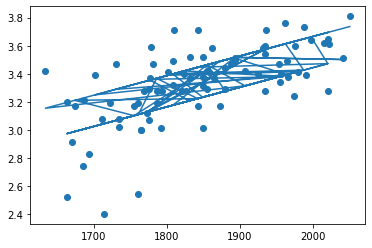

In [25]:
GPA = 0.6439+ 0.0014*data.SAT + 0.2226*data.NewAttendance
plt.scatter(data.SAT, data.GPA)
plt.plot(data.SAT, GPA);

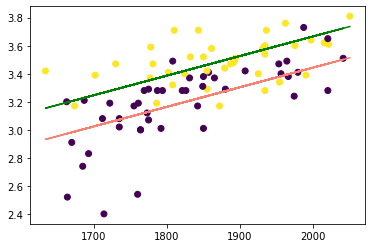

In [29]:
GPA = 0.6439+ 0.0014*data.SAT + 0.2226*data.NewAttendance
#GPA_yes = 0.6439+ 0.0014*data.SAT + 0.2226*1
GPA_yes = 0.8665+ 0.0014*data.SAT
GPA_no = 0.6439+ 0.0014*data.SAT

plt.scatter(data.SAT, data.GPA, c=data.NewAttendance)
plt.plot(data.SAT, GPA_yes, c='green')
plt.plot(data.SAT, GPA_no, c='salmon')

In [35]:
new_data1 = pd.DataFrame({'const':1,'SAT':[1700,1800,1900]}, index=['철수','영희','길동'])
result1.predict(new_data1)

철수    3.089710
영희    3.255279
길동    3.420848
dtype: float64

In [37]:
new_data2 = pd.DataFrame({'const':1,'SAT':[1700,1800,1900],'NewAttendance':[1,0,1]}, index=['철수','영희','길동'])
result2.predict(new_data2)

철수    3.246157
영희    3.163493
길동    3.526118
dtype: float64